This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [23]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6152 - accuracy: 0.8097 - val_loss: 0.2850 - val_accuracy: 0.9143
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2525 - accuracy: 0.9217 - val_loss: 0.1925 - val_accuracy: 0.9431
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1636 - accuracy: 0.9494 - val_loss: 0.1594 - val_accuracy: 0.9520
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1202 - accuracy: 0.9628 - val_loss: 0.1419 - val_accuracy: 0.9564
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0851 - accuracy: 0.9736 - val_loss: 0.1351 - val_accuracy: 0.9599
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0648 - accuracy: 0.9793 - val_loss: 0.1345 - val_accuracy: 0.9621
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0482 - accuracy: 0.9844 - val_loss: 0.1520 - val_accuracy: 0.9588
Epoch 

**Plotting a validation accuracy comparison**

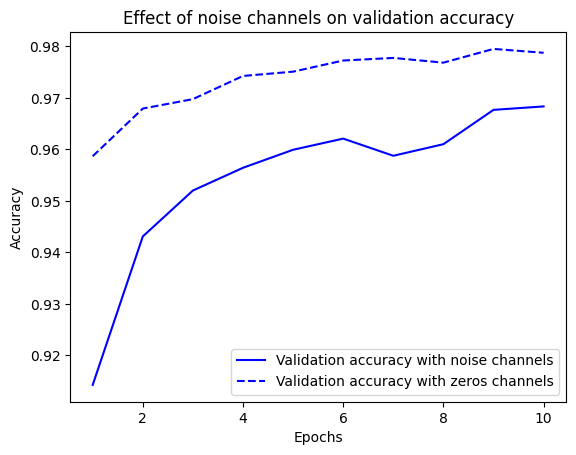

In [25]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [27]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)


Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3162 - accuracy: 0.1013 - val_loss: 2.3044 - val_accuracy: 0.1073
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2997 - accuracy: 0.1140 - val_loss: 2.3087 - val_accuracy: 0.1034
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2923 - accuracy: 0.1241 - val_loss: 2.3168 - val_accuracy: 0.1032
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2805 - accuracy: 0.1371 - val_loss: 2.3238 - val_accuracy: 0.1063
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2655 - accuracy: 0.1512 - val_loss: 2.3333 - val_accuracy: 0.1047
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2464 - accuracy: 0.1636 - val_loss: 2.3495 - val_accuracy: 0.1032
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2230 - accuracy: 0.1778 - val_loss: 2.3651 - val_accuracy: 0.0998

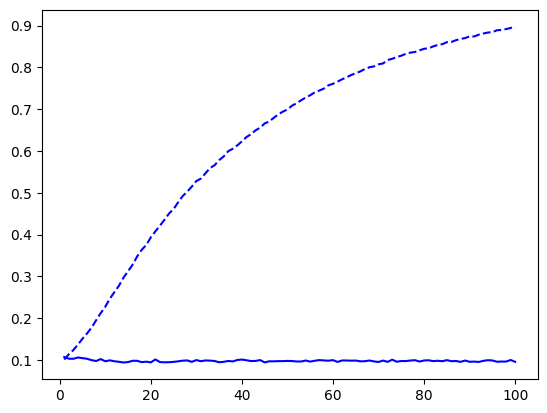

In [31]:
epochs = range(1, 101)
plt.plot(epochs, history.history["val_accuracy"] , "b-",
         label="training accuracy")
plt.plot(epochs, history.history["accuracy"] , "b--",
         label="accuracy")

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [34]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 660.9160 - accuracy: 0.2912 - val_loss: 2.1579 - val_accuracy: 0.2431
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.6400 - accuracy: 0.2270 - val_loss: 2.1998 - val_accuracy: 0.2185
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.5373 - accuracy: 0.2351 - val_loss: 5.6307 - val_accuracy: 0.1952
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4728 - accuracy: 0.2034 - val_loss: 2.2585 - val_accuracy: 0.2251
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2825 - accuracy: 0.2143 - val_loss: 2.2938 - val_accuracy: 0.1977
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7512 - accuracy: 0.2238 - val_loss: 2.2734 - val_accuracy: 0.2172
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4992 - accuracy: 0.2336 - val_loss: 2.2831 - val_accuracy: 0.2338
Epoc

**The same model with a more appropriate learning rate**

In [35]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3259 - accuracy: 0.9119 - val_loss: 0.1249 - val_accuracy: 0.9626
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1230 - accuracy: 0.9651 - val_loss: 0.1470 - val_accuracy: 0.9655
Epoch 3/10
375/375 [==============================] - 2s 7ms/step - loss: 0.0956 - accuracy: 0.9744 - val_loss: 0.1291 - val_accuracy: 0.9708
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0798 - accuracy: 0.9796 - val_loss: 0.1747 - val_accuracy: 0.9680
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0674 - accuracy: 0.9826 - val_loss: 0.1722 - val_accuracy: 0.9693
Epoch 6/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0596 - accuracy: 0.9852 - val_loss: 0.2037 - val_accuracy: 0.9673
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0555 - accuracy: 0.9866 - val_loss: 0.2028 - val_accuracy: 0.9722
Epoch 

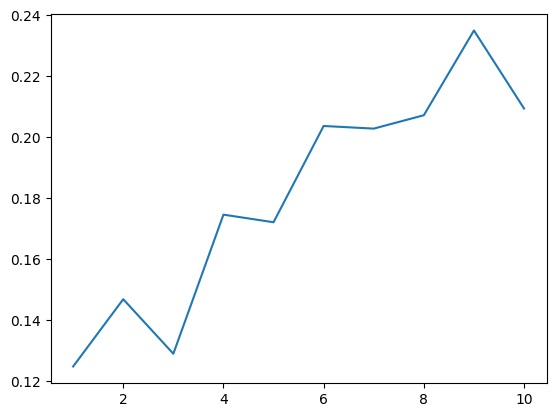

In [40]:
val_loss = history.history['val_loss']
epochs = range(1, 11)
plt.plot(epochs, val_loss)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [41]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6639 - accuracy: 0.8369 - val_loss: 0.3579 - val_accuracy: 0.9028
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.9026 - val_loss: 0.3100 - val_accuracy: 0.9134
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3181 - accuracy: 0.9116 - val_loss: 0.2921 - val_accuracy: 0.9197
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3018 - accuracy: 0.9155 - val_loss: 0.2863 - val_accuracy: 0.9193
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2922 - accuracy: 0.9186 - val_loss: 0.2779 - val_accuracy: 0.9236
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9197 - val_loss: 0.2748 - val_accuracy: 0.9236
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2804 - accuracy: 0.9218 - val_loss: 0.2728 - val_accuracy: 0.9268
Epoch 

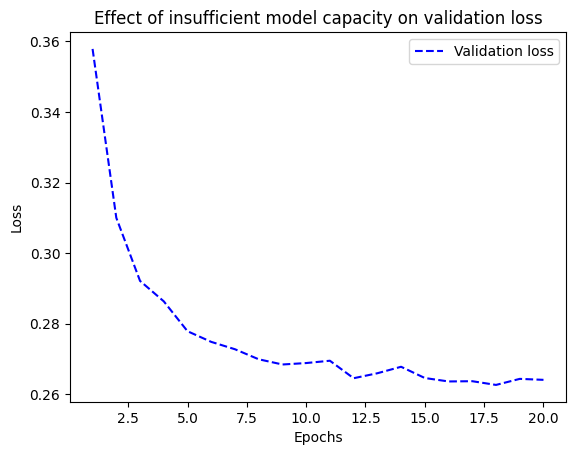

In [42]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [43]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3655 - accuracy: 0.8945 - val_loss: 0.2069 - val_accuracy: 0.9375
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1651 - accuracy: 0.9508 - val_loss: 0.1606 - val_accuracy: 0.9504
Epoch 3/20
375/375 [==============================] - 2s 4ms/step - loss: 0.1139 - accuracy: 0.9659 - val_loss: 0.1173 - val_accuracy: 0.9643
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9734 - val_loss: 0.0996 - val_accuracy: 0.9698
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0696 - accuracy: 0.9791 - val_loss: 0.0937 - val_accuracy: 0.9716
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0571 - accuracy: 0.9826 - val_loss: 0.0837 - val_accuracy: 0.9741
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0469 - accuracy: 0.9862 - val_loss: 0.0893 - val_accuracy: 0.9743
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [44]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 3s 73ms/step - loss: 0.5704 - accuracy: 0.7617 - val_loss: 0.4390 - val_accuracy: 0.8589
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3659 - accuracy: 0.8839 - val_loss: 0.3399 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2735 - accuracy: 0.9077 - val_loss: 0.2944 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2176 - accuracy: 0.9248 - val_loss: 0.2927 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1828 - accuracy: 0.9373 - val_loss: 0.2765 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1533 - accuracy: 0.9499 - val_loss: 0.2866 - val_accuracy: 0.8866
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1330 - accurac

**Version of the model with lower capacity**

In [45]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.6318 - accuracy: 0.7213 - val_loss: 0.5713 - val_accuracy: 0.7674
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.5189 - accuracy: 0.8477 - val_loss: 0.4801 - val_accuracy: 0.8586
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4281 - accuracy: 0.8827 - val_loss: 0.4140 - val_accuracy: 0.8610
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3588 - accuracy: 0.8971 - val_loss: 0.3624 - val_accuracy: 0.8771
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3048 - accuracy: 0.9097 - val_loss: 0.3259 - val_accuracy: 0.8826
Epoch 6/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2640 - accuracy: 0.9171 - val_loss: 0.3025 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2334 - accuracy: 0.9261 - val_loss: 0.2882 - val_accuracy: 0.8889
Epoch 8/20
30

**Version of the model with higher capacity**

In [46]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 82ms/step - loss: 0.5685 - accuracy: 0.7193 - val_loss: 0.3828 - val_accuracy: 0.8401
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3338 - accuracy: 0.8629 - val_loss: 0.3069 - val_accuracy: 0.8725
Epoch 3/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2275 - accuracy: 0.9082 - val_loss: 0.2763 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1920 - accuracy: 0.9263 - val_loss: 0.2819 - val_accuracy: 0.8853
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1486 - accuracy: 0.9449 - val_loss: 0.2946 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1025 - accuracy: 0.9631 - val_loss: 0.5717 - val_accuracy: 0.8081
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0931 - accuracy: 0.9682 - val_loss: 0.3174 - val_accuracy: 0.8851
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

## Summary